In [1]:
# auto-reload mytools
%load_ext autoreload
%autoreload 2

# Heatmap

In [2]:
from mytools.plot import (
    plot_heatmap, plot_heatmaps, set_ticks, get_ticks_labels, make_figure, plot_axlines
)
from mytools.plot_custom import plot_stack_fit_res, plot_res
%matplotlib inline

## gen test data

In [3]:
import numpy as np
shape = (120, 120)
test_data = np.zeros(shape)

# generate a test data with two circular peaks 
x = np.arange(shape[0])
y = np.arange(shape[1])
X,Y = np.meshgrid(x,y)
test_data += np.exp(-((X-40)**2 + (Y-60)**2)/100) * 100
test_data += np.exp(-((X-80)**2 + (Y-60)**2)/100) * 100

# add noise
np.random.seed(42)
test_data_noisy = test_data + np.random.randn(*shape) / 1

## plot heatmap

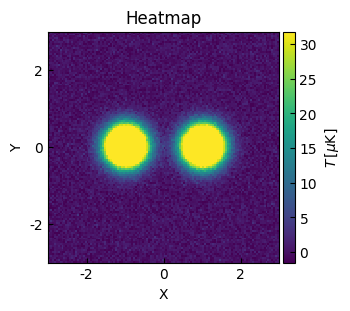

In [4]:
# simple plot
plot_heatmap(test_data_noisy);

## change title, xlabel, ylabel, cbar_label

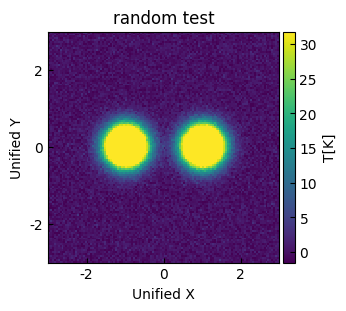

In [5]:
title = 'random test'
xlabel = 'Unified X'
ylabel = 'Unified Y'
cbar_label = 'T[K]'
plot_heatmap(
    test_data_noisy, 
    cbar_label=cbar_label, 
    xlabel=xlabel, ylabel=ylabel, title=title
);

## change vmin, vmax 

through `q` parameter for percentile normalization

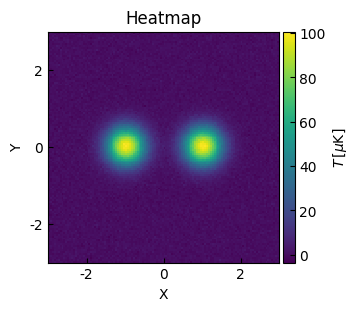

In [6]:
q = None # to disable percentile normalization
plot_heatmap(test_data_noisy, q=q);

or directly set `vmin` and `vmax` parameter

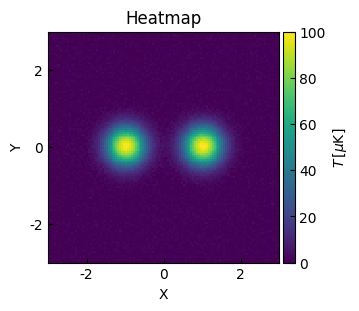

In [7]:
plot_heatmap(test_data_noisy, vmin=0, vmax=100);

## change ticks and ticklabels
The `plot_heatmap` use the default ticks and ticklabels are generated by `get_ticks_labels` function.
You can set `change_ticks` to `False` to disable this.

You can also generate your own ticks and ticklabels with `get_ticks_labels` , and change the ticks and ticklabels with `set_ticks` function.

In [8]:
# generate ticks and ticklabels through `get_ticks_labels` function
ticks = [0, 20, 40, 60, 80, 100, 120]
ticks, ticklabels = get_ticks_labels(ticks)
print(ticklabels)

['-3', '-2', '-1', '0', '1', '2', '3']


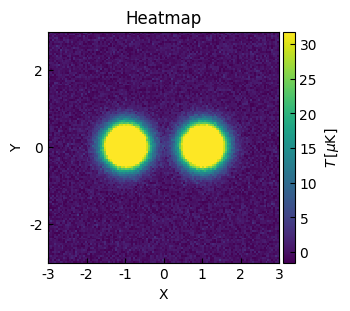

In [9]:
# change ticks and ticklabels with `set_ticks` function
ax = plot_heatmap(
    test_data_noisy,
)
set_ticks(ax, xticks=ticks, xticklabels=ticklabels, share=False)

## plot multiple heatmaps

the input params with only one value will be applied to all subplots, i.e. `norm`, `title`...

And `sharex` `sharey` are `True` by default in `make_figure` function, can be modified through `kw_makefigure` parameter

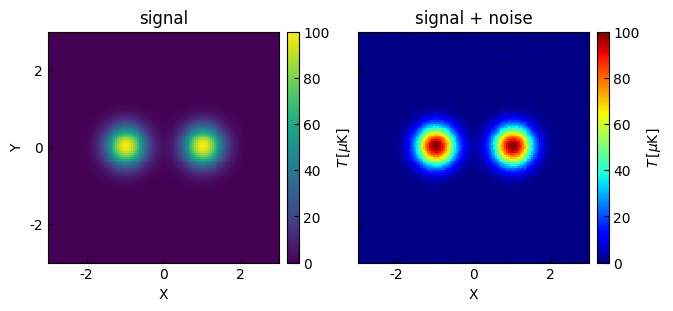

In [10]:
data2=[test_data,test_data_noisy]
norm = 'linear'
cmap=['viridis', 'jet']
show_cbar =  True
vmax = 100
vmin = 0
title = ['signal', 'signal + noise']

axes = plot_heatmaps(
    data2, cmap=cmap, norm=norm, vmax=vmax, vmin=vmin,
    show_cbar=show_cbar,
    title=title
)

Additional custom plot_heatmaps functionality:
`plot_stack_fit_residual` and `plot_residuals`

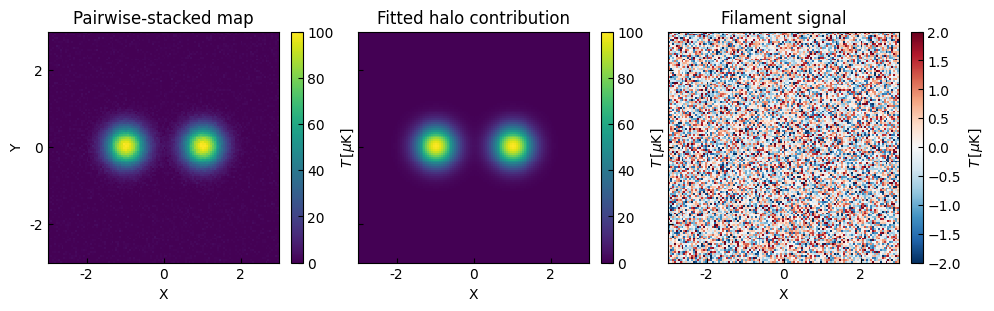

In [11]:
data3 = [test_data_noisy, test_data, test_data_noisy - test_data]

axes = plot_stack_fit_res(
    data3,
    vmax=[100, 100, 2],
    vmin=[0, 0, -2],
)

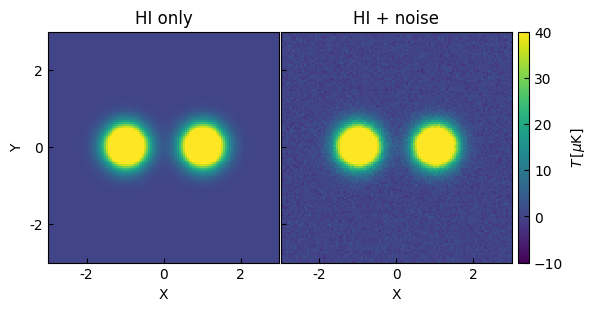

In [12]:
axes = plot_res(
    [test_data, test_data_noisy],
)

## plot axlines

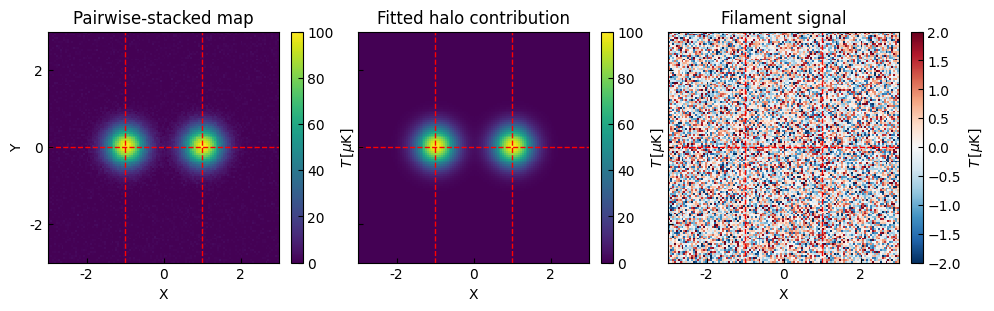

In [13]:
vl = [40, 80]
hl = [60]

axes = plot_stack_fit_res(
    data3,
    vmax=[100, 100, 2],
    vmin=[0, 0, -2],
)

plot_axlines(axes, vl=vl, hl=hl);

# Line

In [14]:
from mytools.plot import plot_line
from mytools.plot_custom import plot_profile_2c, plot_profile_2c2r, plot_profile_2r

## plot lines

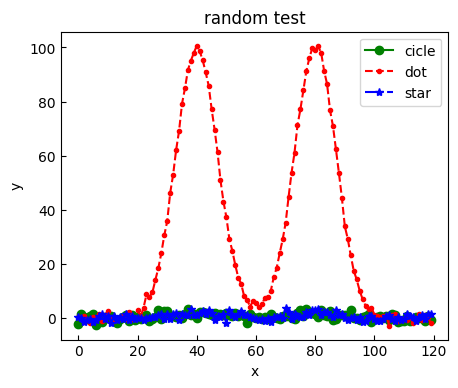

In [15]:
plot_line(
    x=[range(shape[1])]*3,
    y=[test_data_noisy[80], test_data_noisy[60], test_data_noisy[40]], 
    xlabel='x', 
    ylabel='y', 
    title='random test', 
    color=[ 'green', 'red', 'blue'],
    marker=['o', '.', '*'],
    linestyle=['-', '--', '-.'],
    label=['cicle', 'dot', 'star'], 
);

## plot profiles

In [16]:
## generate test  data, including gaussian profile and random data
xx = np.linspace(-3, 3, 120)
yy = np.exp(-xx**2/0.5) * 5

xx_ = np.linspace(-0.5, 0.5, 20)
yy_ = np.random.random((20))

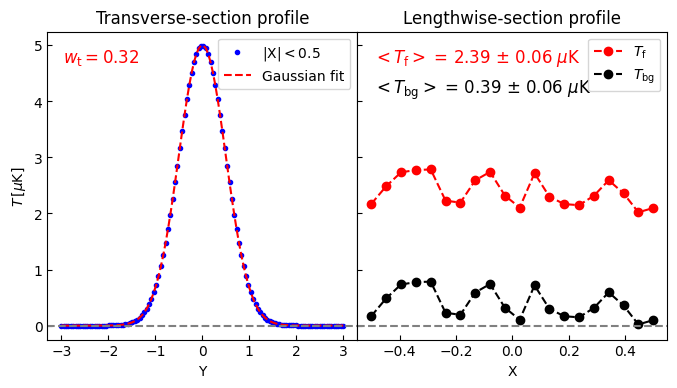

In [17]:
## one raw two columns
fig, axes = make_figure(1,2, figsize=(8,4), sharey=True, sharex=False, aspect=None)
# use default text position and fontsize
plot_profile_2c(x=[xx, xx, xx_, xx_],y=[yy, yy, yy_+2, yy_,], axes=axes);

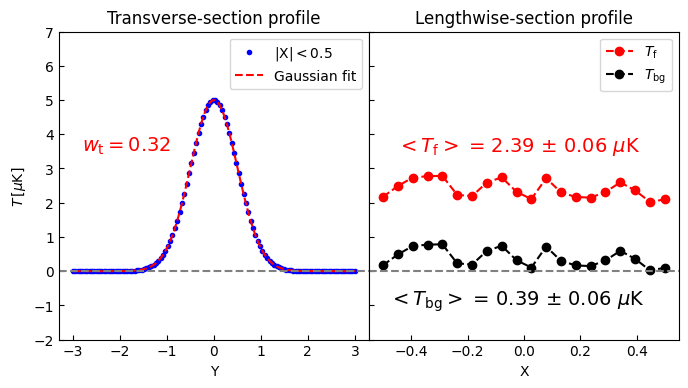

In [18]:
# use custom text postion and fontsize
text_pos = [
    [-0.45, 3.5], 
    [-0.48, -1], 
    [-2.8, 3.5],
]
fontsize = 14


fig, axes = make_figure(1,2, figsize=(8,4), sharey=True, sharex=False, aspect=None)

plot_profile_2c(x=[xx, xx, xx_, xx_],y=[yy, yy, yy_+2, yy_,], fontsize=fontsize, axes=axes, text_pos=text_pos)

axes[0].set_ylim([-2, 7]);

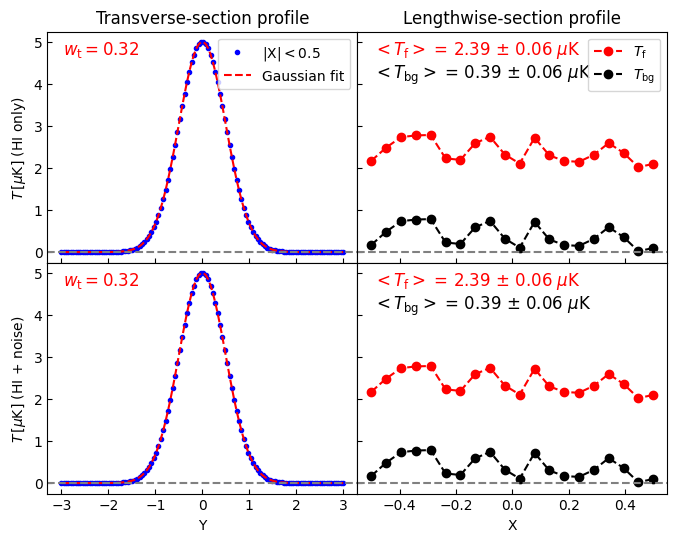

In [19]:
## two rows two columns
axes = plot_profile_2c2r(x=[[xx, xx, xx_, xx_]]*2,y=[[yy, yy, yy_+2, yy_]]*2)

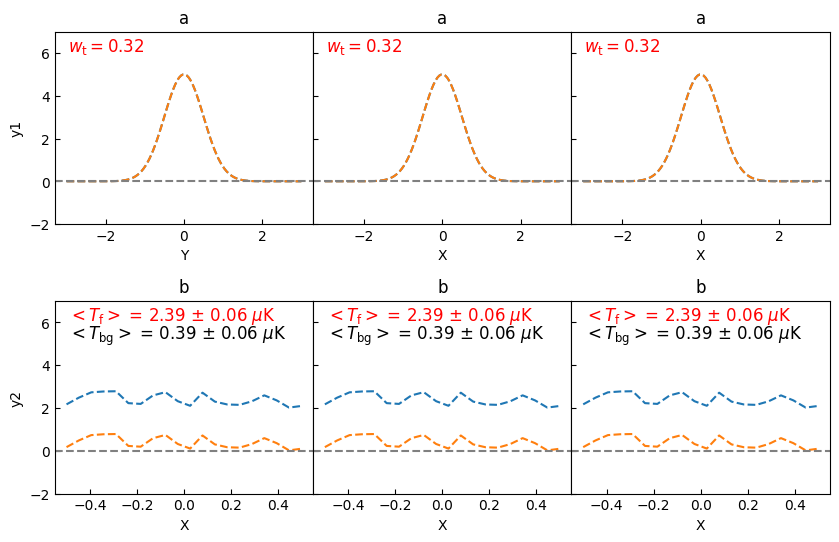

In [20]:
# two row and multiple columns
title = ['a', 'b']*3
ylabel = ['y1', 'y2', None] # None will be spread to rest subplots

axes = plot_profile_2r(x=[[xx, xx, xx_, xx_,]]*3,y=[[yy, yy, yy_+2, yy_]]*3, title=title, ylabel=ylabel)
axes[0,0].set_ylim([-2, 7])
axes[1,0].set_ylim([-2, 7])

# maniulate figure through get_figure
fig = axes[0,0].get_figure()
fig.set_size_inches(10, 6)

# Histogram

In [21]:
from mytools.plot import  plot_hist
from mytools.plot_custom import plot_hist_result

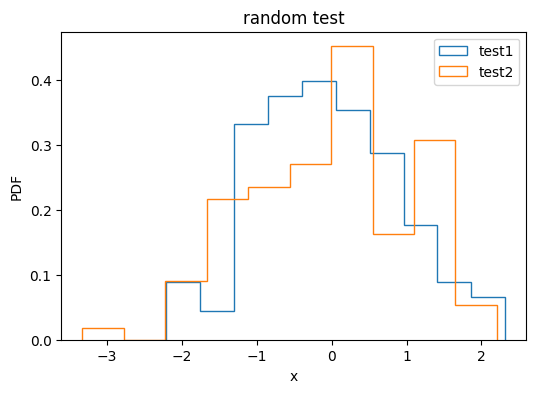

In [22]:
hist_data = [np.random.normal(size=100) for _ in range(8)]
plot_hist([hist_data[0], hist_data[1]], bins=10, title='random test', xlabel='x', label=['test1', 'test2']);

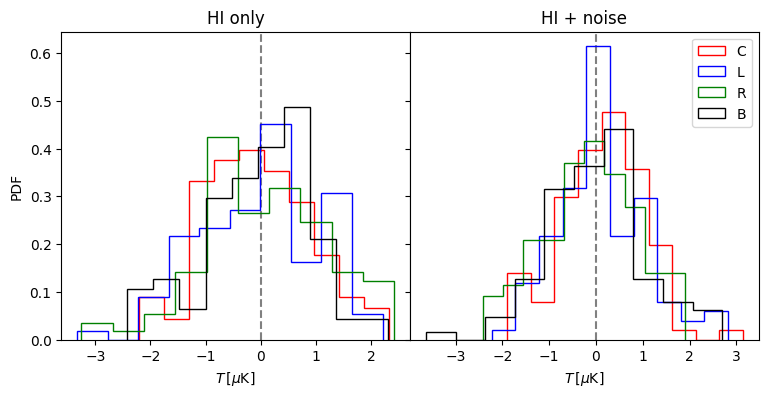

In [23]:
plot_hist_result(hist_data, bins=10,);

# Arcs

In [24]:
from mytools.plot import plot_sector, plot_ellipses, plot_arcs

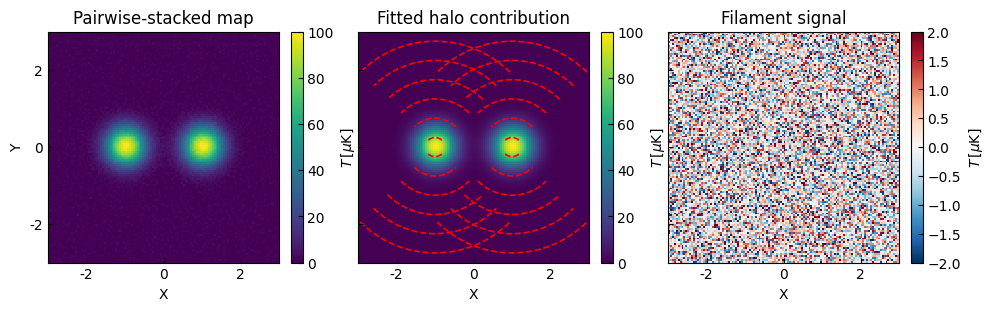

In [25]:
axes = plot_stack_fit_res(
    data3,
    vmax=[100, 100, 2],
    vmin=[0, 0, -2],
)
# plot sector
plot_sector(axes[1], ec='r')

(np.float64(-5.0), np.float64(5.0), np.float64(-5.0), np.float64(5.0))

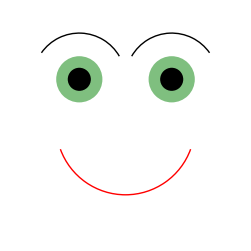

In [26]:
# or self defined pattern
fig, ax = make_figure(figsize=(4,3))
plot_ellipses(ax, [[-2,2],[-2,2],[2,2],[2,2]], [2,1,2,1], fc=['g', 'k', 'g', 'k'], alpha=[0.5, 1]*2)
plot_arcs(ax, [[-2,2],[2,2], [0,0]], [4,4, 6], theta1=[30, 35, 200], theta2=[145,150, 340], ec=['k','k', 'r'])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.axis('off')

# save figure

In [27]:
from mytools.plot import save_plot

In [28]:
filename = 'example.png'
save_plot(ax, filename)

Plot saved to example.png
